In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = [16,8]

In [75]:
df = pd.read_csv('AirPassengers.csv', header=0, parse_dates=[0], index_col=0)
df.squeeze("columns")
df.head(10)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


#### As vezes é importante o Random Forest para ST, a fim de encontrarmos uma melhor parte da série histórica para uso na aplicação do modelo e termos melhores resultados

In [76]:
# Primeiramente vamos tornar os dados estacionários com diferenciação
diff = df.diff(12)
#Neste caso vamos encontrar muitos valores NAN, logo precisamos remover
diff = diff[12:]
diff.head(13)

,#Passengers
Month,
1950-01-01,3.0
1950-02-01,8.0
1950-03-01,9.0
1950-04-01,6.0
1950-05-01,4.0
1950-06-01,14.0
1950-07-01,22.0
1950-08-01,22.0
1950-09-01,22.0


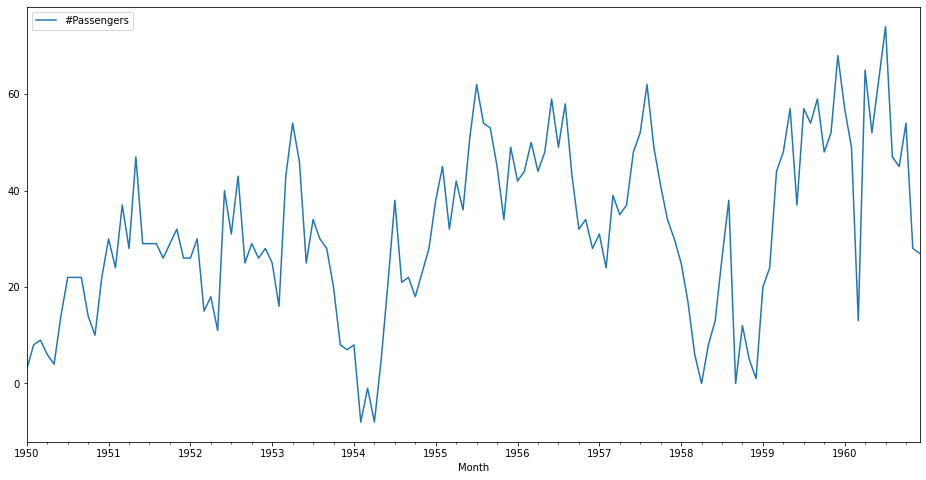

In [77]:
diff.plot()
plt.show()

In [78]:
# Criando o dataframe para aplicar depois o Random Forest
df1 = pd.DataFrame()
for i in range(12,0,-1):
    df1['t-'+str(i)] = diff.shift(i)
df1['t'] = diff.values
print(df1.head(13))

            t-12  t-11  t-10  t-9  t-8   t-7   t-6   t-5   t-4   t-3   t-2  \
Month                                                                        
1950-01-01   NaN   NaN   NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1950-02-01   NaN   NaN   NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1950-03-01   NaN   NaN   NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   3.0   
1950-04-01   NaN   NaN   NaN  NaN  NaN   NaN   NaN   NaN   NaN   3.0   8.0   
1950-05-01   NaN   NaN   NaN  NaN  NaN   NaN   NaN   NaN   3.0   8.0   9.0   
1950-06-01   NaN   NaN   NaN  NaN  NaN   NaN   NaN   3.0   8.0   9.0   6.0   
1950-07-01   NaN   NaN   NaN  NaN  NaN   NaN   3.0   8.0   9.0   6.0   4.0   
1950-08-01   NaN   NaN   NaN  NaN  NaN   3.0   8.0   9.0   6.0   4.0  14.0   
1950-09-01   NaN   NaN   NaN  NaN  3.0   8.0   9.0   6.0   4.0  14.0  22.0   
1950-10-01   NaN   NaN   NaN  3.0  8.0   9.0   6.0   4.0  14.0  22.0  22.0   
1950-11-01   NaN   NaN   3.0  8.0  9.0   6.0   4.0  14.0  22.0  

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
array = df1.values
X = array[:,0:-1]
y = array[:,-1]

In [83]:
modelo = RandomForestRegressor(n_estimators=500, random_state=1)
modelo.fit(X,y)

# Este não consigo aplicar o modelo acima, pois o array contém NAN values

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values